# Product Analyst Project: Advanced EDA and Feature Analysis

## 1. Import Required Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv("DATA/Product_Feature_Usage_Complex.csv")
df.head()

,session_id,user_id,session_date,feature_used,session_duration_min,conversion_flag,platform,device_type,satisfaction_score,location_city,ab_test_group,loyalty_tier
0,session_1,user_7271,2024-03-22 02:00:00,Weekly Offers,7.40,0,Web,Phone,5,Winnipeg,A,Silver
1,session_2,user_861,2024-01-26 20:00:00,Loyalty Tier Info,1.92,1,Android,Desktop,5,Montreal,A,Silver
2,session_3,user_5391,2024-01-29 04:00:00,Scan & Pay,4.08,1,Web,Tablet,4,Ottawa,B,Silver
3,session_4,user_5192,2024-04-10 17:00:00,Push Notifications,5.80,0,iOS,Desktop,5,Ottawa,B,Gold
4,session_5,user_5735,2024-02-02 02:00:00,Digital Coupons,2.73,0,Web,Desktop,3,Calgary,B,Silver


## 2. Basic Data Exploration

In [2]:
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
df.describe(include='all')


Data Shape: (50000, 12)
Data Types:
 session_id               object
user_id                  object
session_date             object
feature_used             object
session_duration_min    float64
conversion_flag           int64
platform                 object
device_type              object
satisfaction_score        int64
location_city            object
ab_test_group            object
loyalty_tier             object
dtype: object
Missing Values:
 session_id              0
user_id                 0
session_date            0
feature_used            0
session_duration_min    0
conversion_flag         0
platform                0
device_type             0
satisfaction_score      0
location_city           0
ab_test_group           0
loyalty_tier            0
dtype: int64


,session_id,user_id,session_date,feature_used,session_duration_min,conversion_flag,platform,device_type,satisfaction_score,location_city,ab_test_group,loyalty_tier
count,50000,50000,50000,50000,50000.000000,50000.000000,50000,50000,50000.000000,50000,50000,50000
unique,50000,9924,2881,10,NaN,NaN,3,3,NaN,7,2,3
top,session_49984,user_28,2024-04-06 22:00:00,Weekly Offers,NaN,NaN,Web,Desktop,NaN,Ottawa,B,Silver
freq,1,14,32,9972,NaN,NaN,16793,16767,NaN,7296,25253,25009
mean,NaN,NaN,NaN,NaN,6.014461,0.350260,NaN,NaN,3.647340,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.233629,0.477056,NaN,NaN,1.108384,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.010000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.910000,0.000000,NaN,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.045000,0.000000,NaN,NaN,4.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,8.040000,1.000000,NaN,NaN,5.000000,NaN,NaN,NaN


## 3. Data Cleaning & Feature Engineering

In [3]:
# Convert datetime
df['session_date'] = pd.to_datetime(df['session_date'])

# Add new temporal features
df['month'] = df['session_date'].dt.month
df['day'] = df['session_date'].dt.day
df['hour'] = df['session_date'].dt.hour
df['weekday'] = df['session_date'].dt.day_name()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove outliers (top 1% session duration)
q_hi = df['session_duration_min'].quantile(0.99)
df = df[df['session_duration_min'] < q_hi]

# Sanity check on data
df.reset_index(drop=True, inplace=True)
df.head()


,session_id,user_id,session_date,feature_used,session_duration_min,conversion_flag,platform,device_type,satisfaction_score,location_city,ab_test_group,loyalty_tier,month,day,hour,weekday
0,session_1,user_7271,2024-03-22 02:00:00,Weekly Offers,7.40,0,Web,Phone,5,Winnipeg,A,Silver,3,22,2,Friday
1,session_2,user_861,2024-01-26 20:00:00,Loyalty Tier Info,1.92,1,Android,Desktop,5,Montreal,A,Silver,1,26,20,Friday
2,session_3,user_5391,2024-01-29 04:00:00,Scan & Pay,4.08,1,Web,Tablet,4,Ottawa,B,Silver,1,29,4,Monday
3,session_4,user_5192,2024-04-10 17:00:00,Push Notifications,5.80,0,iOS,Desktop,5,Ottawa,B,Gold,4,10,17,Wednesday
4,session_5,user_5735,2024-02-02 02:00:00,Digital Coupons,2.73,0,Web,Desktop,3,Calgary,B,Silver,2,2,2,Friday


## 4. Session Duration Analysis

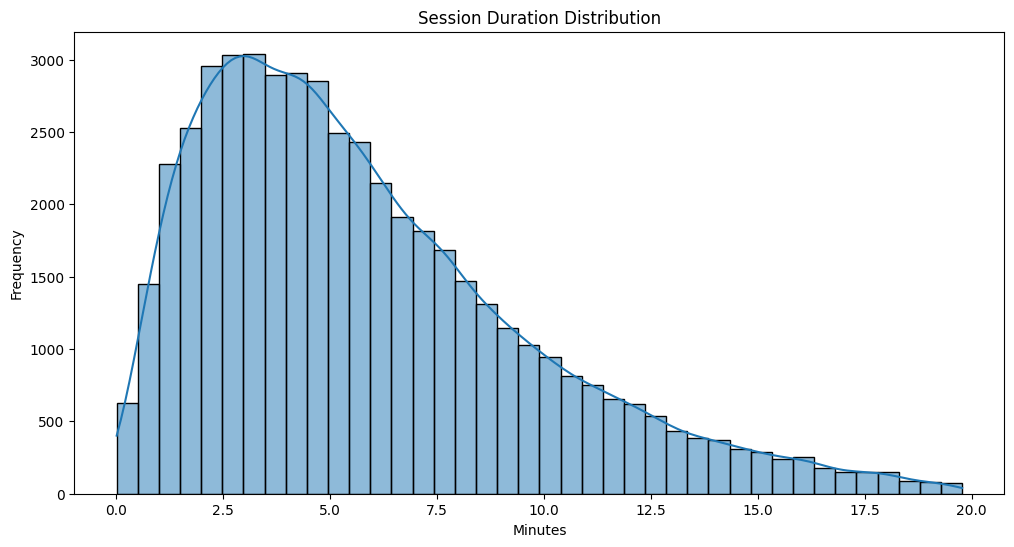

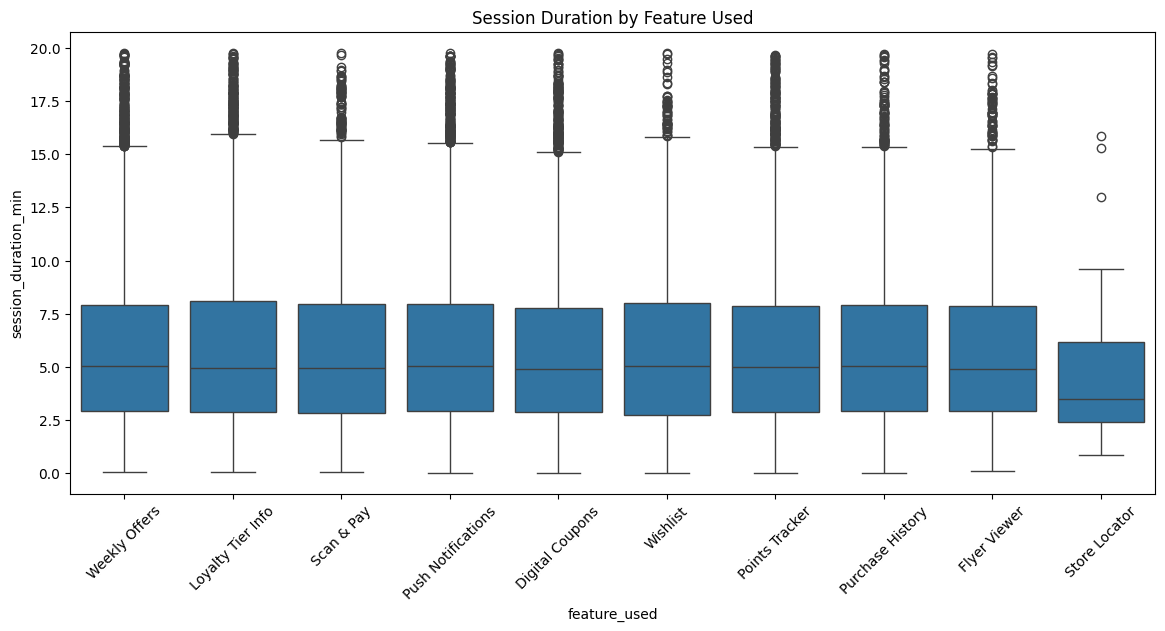

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['session_duration_min'], bins=40, kde=True)
plt.title("Session Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

# Boxplot by Feature
plt.figure(figsize=(14, 6))
sns.boxplot(x='feature_used', y='session_duration_min', data=df)
plt.xticks(rotation=45)
plt.title("Session Duration by Feature Used")
plt.show()


## 5. Conversion Analysis

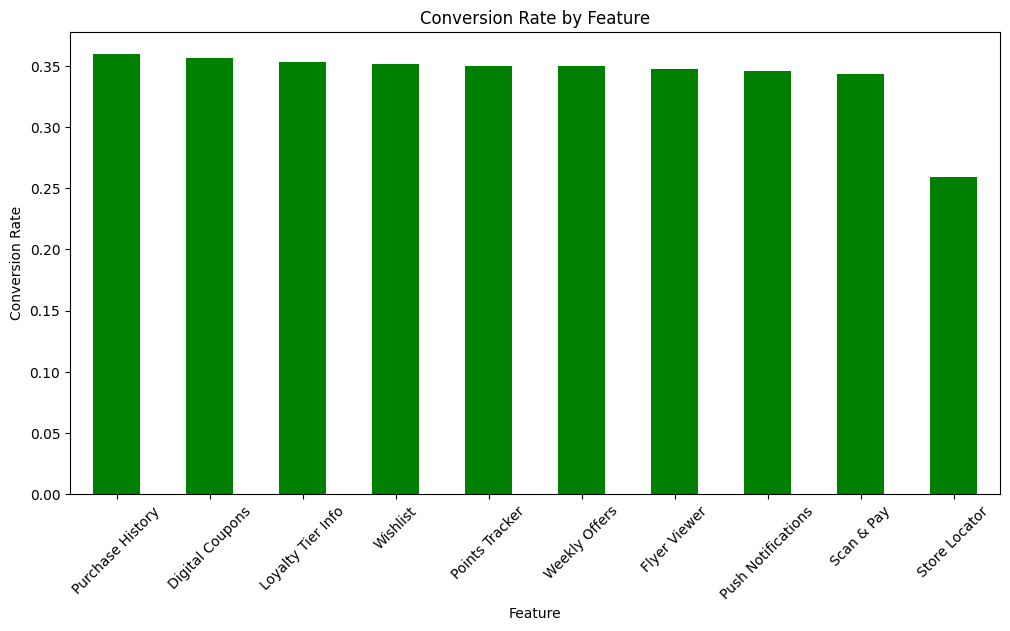

In [5]:
conversion_rate = df.groupby('feature_used')['conversion_flag'].mean().sort_values(ascending=False)
conversion_rate.plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Conversion Rate by Feature")
plt.ylabel("Conversion Rate")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()


## 6. A/B Testing Impact on Conversions

                   mean  count
ab_test_group                 
A              0.354394  24501
B              0.346774  24999


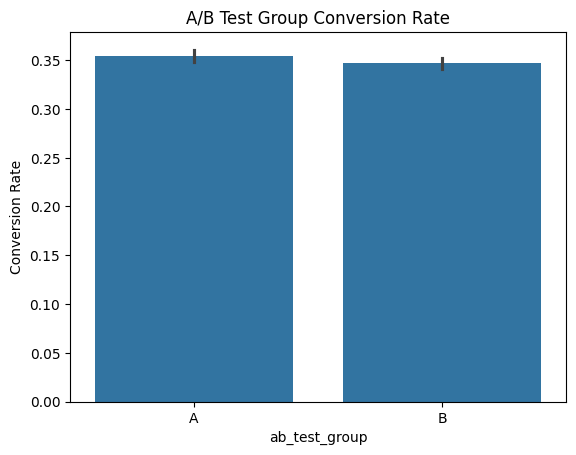

In [6]:
ab_group_stats = df.groupby('ab_test_group')['conversion_flag'].agg(['mean', 'count'])
print(ab_group_stats)

sns.barplot(x='ab_test_group', y='conversion_flag', data=df)
plt.title("A/B Test Group Conversion Rate")
plt.ylabel("Conversion Rate")
plt.show()


## 7. Platform and Device Analysis

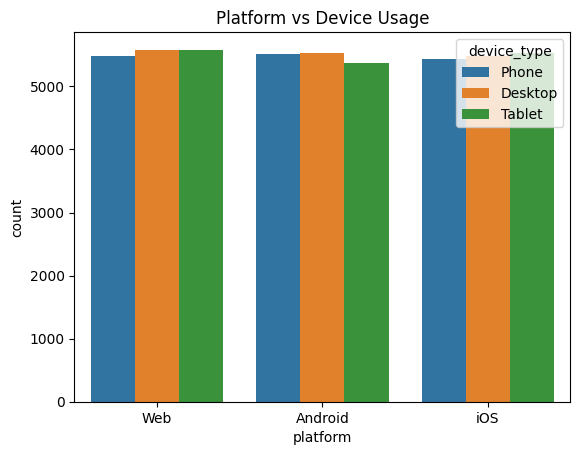

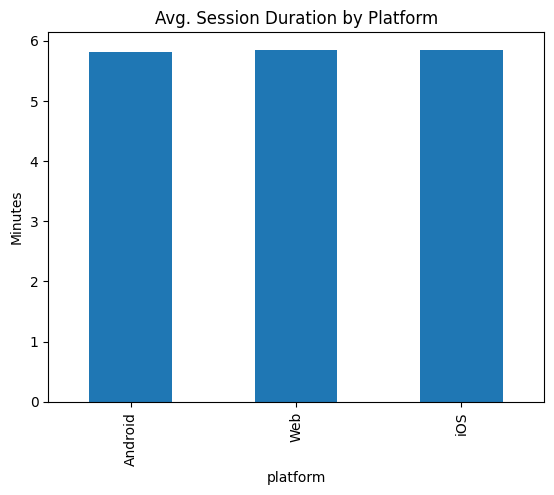

In [7]:
sns.countplot(data=df, x='platform', hue='device_type')
plt.title("Platform vs Device Usage")
plt.show()

# Average duration by platform
df.groupby('platform')['session_duration_min'].mean().plot(kind='bar', title="Avg. Session Duration by Platform")
plt.ylabel("Minutes")
plt.show()


## 8. User Behavior: Active Days, Repeats, Retention

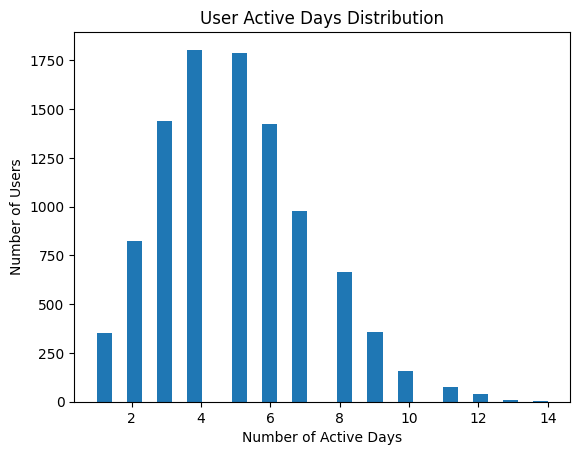

In [8]:
user_activity = df.groupby('user_id')['session_date'].nunique()
plt.hist(user_activity, bins=30)
plt.title("User Active Days Distribution")
plt.xlabel("Number of Active Days")
plt.ylabel("Number of Users")
plt.show()


## 9. Loyalty Tier vs Satisfaction & Conversion

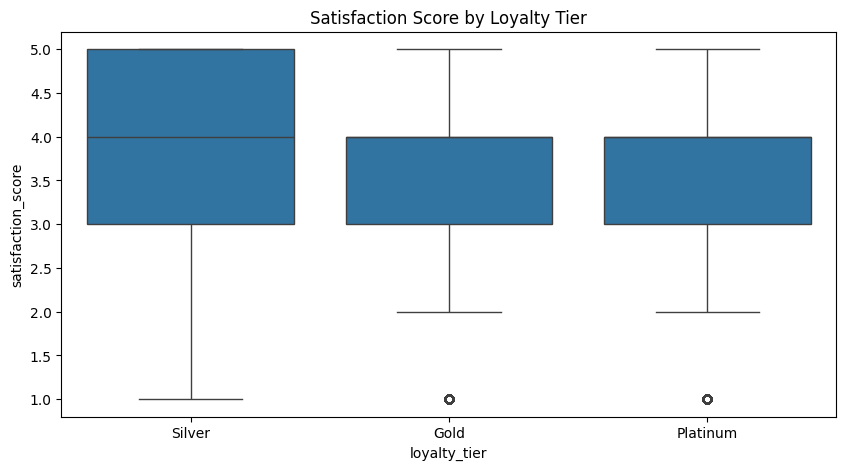

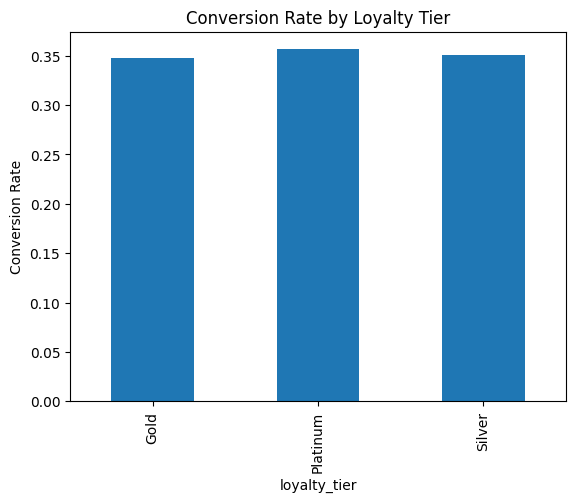

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='loyalty_tier', y='satisfaction_score')
plt.title("Satisfaction Score by Loyalty Tier")
plt.show()

conversion_by_tier = df.groupby('loyalty_tier')['conversion_flag'].mean()
conversion_by_tier.plot(kind='bar', title="Conversion Rate by Loyalty Tier")
plt.ylabel("Conversion Rate")
plt.show()


## 10. Save Cleaned Dataset

In [11]:
df.to_csv("DATA/Cleaned_Product_Feature_Usage.csv", index=False)
print("Cleaned dataset saved.")


Cleaned dataset saved.
